# Prediction of Blast Induced Air Over Pressure

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('limestone_sorted_data.csv')

In [3]:
df.shape

(45, 3)

In [4]:
df.isnull().sum()

Mic_Peak                    0
Charge_per_delay            0
Distance_from_blast_site    0
dtype: int64

In [5]:
df.head()

,Mic_Peak,Charge_per_delay,Distance_from_blast_site
0,108.9,8.30,120.0
1,104.5,8.52,65.0
2,121.9,11.07,75.0
3,100.0,13.80,140.0
4,143.0,14.30,120.0


In [6]:
df.describe()

,Mic_Peak,Charge_per_delay,Distance_from_blast_site
count,45.000000,45.000000,45.000000
mean,117.073889,58.493778,128.111111
std,13.511670,42.157038,57.950693
min,88.000000,8.300000,50.000000
25%,108.900000,37.500000,80.000000
50%,115.000000,49.000000,125.000000
75%,124.000000,66.400000,155.000000
max,145.900000,210.000000,365.000000


# Data Visulization

Text(-0.4, -0.5, 'Pairplot of Columns')

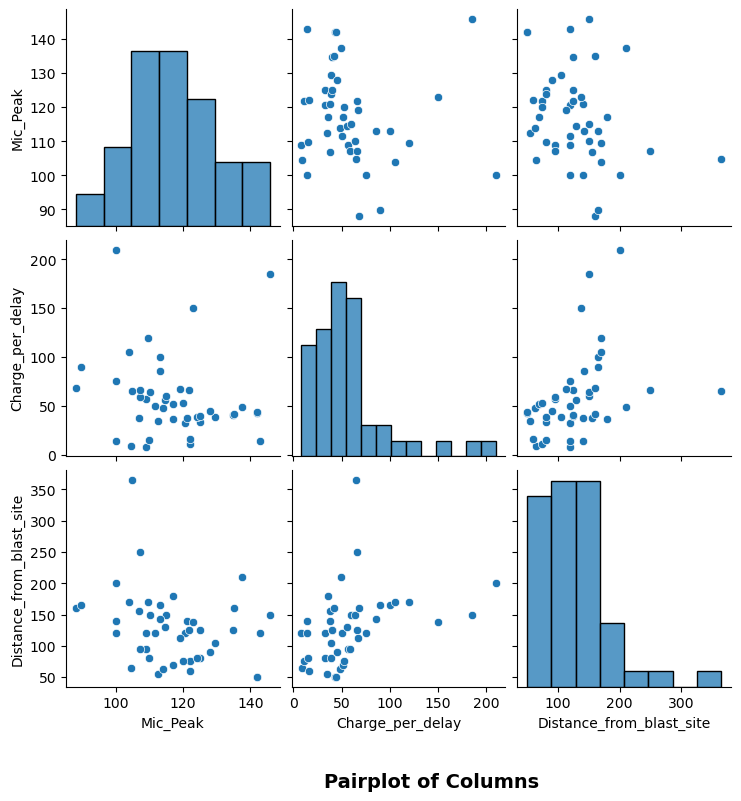

In [7]:
sns.pairplot(df)
plt.title('Pairplot of Columns',fontsize=14, fontweight='bold', loc='center',x=-0.4, y=-0.5)

Text(0.5, -0.5, 'Correlation Matrix')

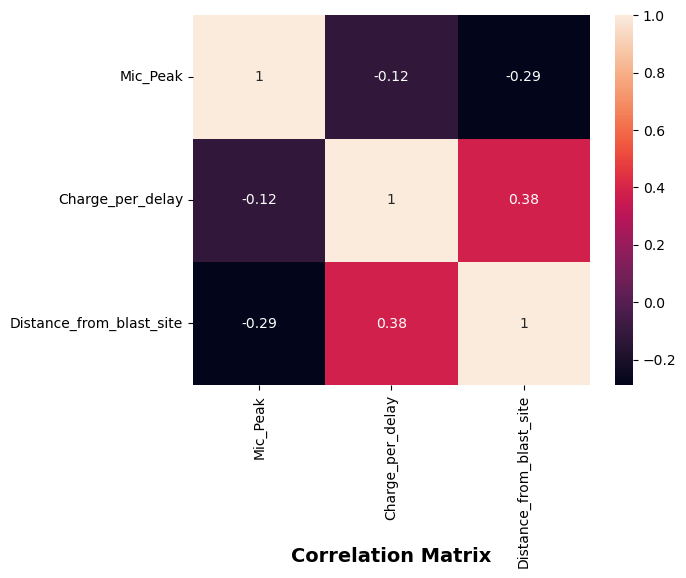

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=14, fontweight='bold', loc='center',y=-0.5)

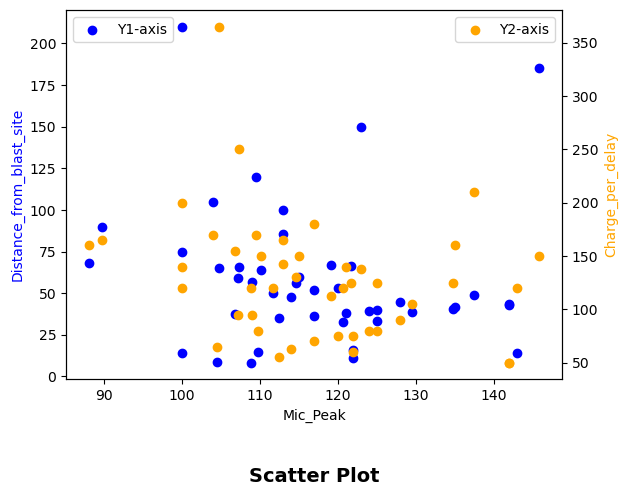

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(df['Mic_Peak'], df['Charge_per_delay'], color='b', label='Y1-axis')
ax2.scatter(df['Mic_Peak'], df['Distance_from_blast_site'], color='#FFA500', label='Y2-axis')

ax1.set_xlabel('Mic_Peak')
ax1.set_ylabel('Distance_from_blast_site', color='b')
ax2.set_ylabel('Charge_per_delay', color='#FFA500')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Scatter Plot',fontsize=14, fontweight='bold', loc='center',y=-0.3)
plt.show()

C:\Users\nimis\AppData\Local\Temp\ipykernel_1312\14218599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Charge_per_delay'])


Text(0.5, -0.3, 'Distribution of Charge Per Delay')

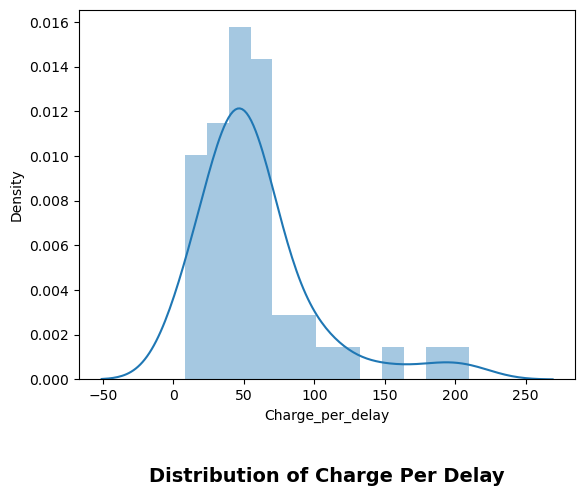

In [10]:
sns.distplot(df['Charge_per_delay'])
plt.title('Distribution of Charge Per Delay',fontsize=14, fontweight='bold',loc='center',y=-0.3)

Text(0.5, -0.3, 'Boxplot of Charge_per_delay')

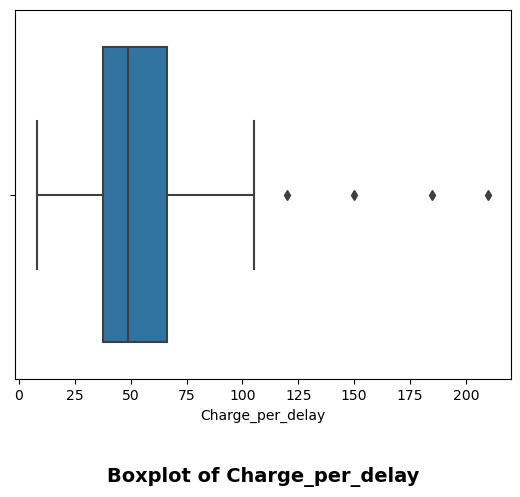

In [11]:
sns.boxplot(x='Charge_per_delay',data=df)
plt.title('Boxplot of Charge_per_delay',fontsize=14, fontweight='bold',loc='center',y=-0.3)

C:\Users\nimis\AppData\Local\Temp\ipykernel_1312\2403323626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Distance_from_blast_site'])


Text(0.5, -0.3, 'Distribution of Distance_from_blast_site')

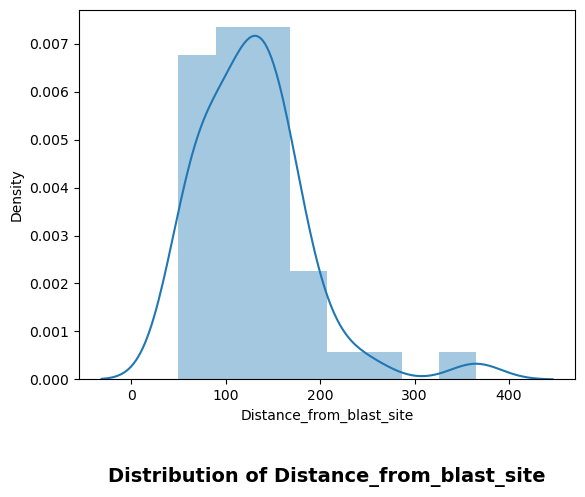

In [12]:
sns.distplot(df['Distance_from_blast_site'])
plt.title('Distribution of Distance_from_blast_site',fontsize=14, fontweight='bold',loc='center',y=-0.3)

Text(0.5, -0.3, 'Boxplot of Distance from blast site')

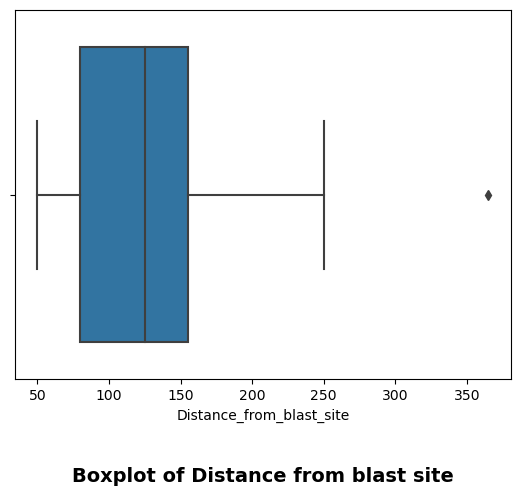

In [13]:
sns.boxplot(x='Distance_from_blast_site',data=df)
plt.title('Boxplot of Distance from blast site',fontsize=14, fontweight='bold',loc='center',y=-0.3)

C:\Users\nimis\AppData\Local\Temp\ipykernel_1312\1217812842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mic_Peak'])


Text(0.5, -0.3, 'Distribution of Mic Peak')

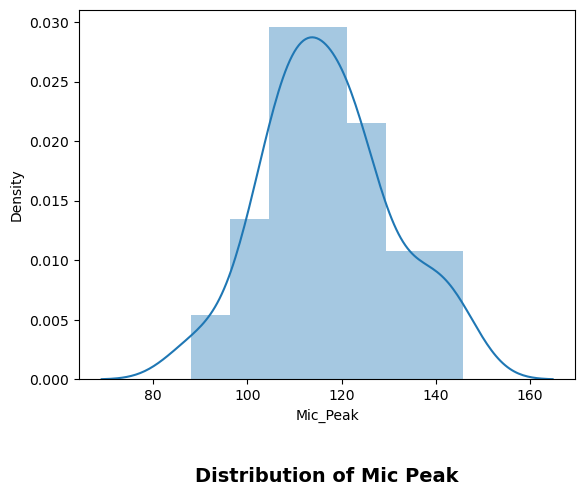

In [14]:
sns.distplot(df['Mic_Peak'])
plt.title('Distribution of Mic Peak',fontsize=14, fontweight='bold',loc='center',y=-0.3)

Text(0.5, -0.3, 'Boxplot of Mic Peak')

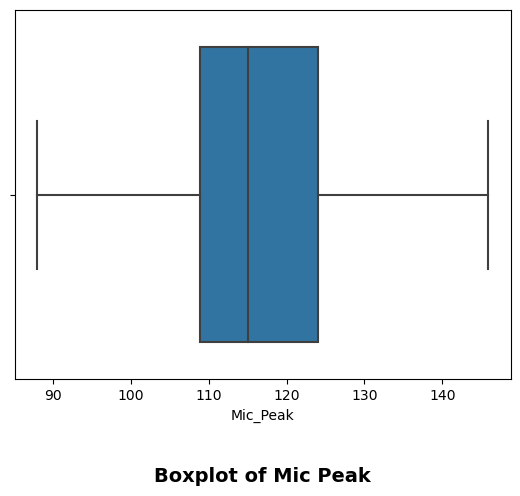

In [15]:
sns.boxplot(x='Mic_Peak',data=df)
plt.title('Boxplot of Mic Peak',fontsize=14, fontweight='bold',loc='center',y=-0.3)

# Removing Outliers Using Inter Quartile Range

In [16]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
columns_to_clean = ['Charge_per_delay', 'Distance_from_blast_site']
final_df = remove_outliers_iqr(df,columns_to_clean)

In [17]:
final_df.shape

(40, 3)

In [18]:
final_df.isnull().sum()

Mic_Peak                    0
Charge_per_delay            0
Distance_from_blast_site    0
dtype: int64

In [19]:
final_df.head()

,Mic_Peak,Charge_per_delay,Distance_from_blast_site
0,108.9,8.30,120.0
1,104.5,8.52,65.0
2,121.9,11.07,75.0
3,100.0,13.80,140.0
4,143.0,14.30,120.0


In [20]:
final_df.describe()

,Mic_Peak,Charge_per_delay,Distance_from_blast_site
count,40.000000,40.000000,40.000000
mean,117.129375,47.555500,118.562500
std,13.073680,23.888076,45.435526
min,88.000000,8.300000,50.000000
25%,108.975000,35.825000,80.000000
50%,116.000000,44.365000,120.000000
75%,124.250000,61.000000,150.000000
max,143.000000,105.000000,250.000000


Text(0.5, -0.3, 'Boxplot of Charge per delay (after removing outlier)')

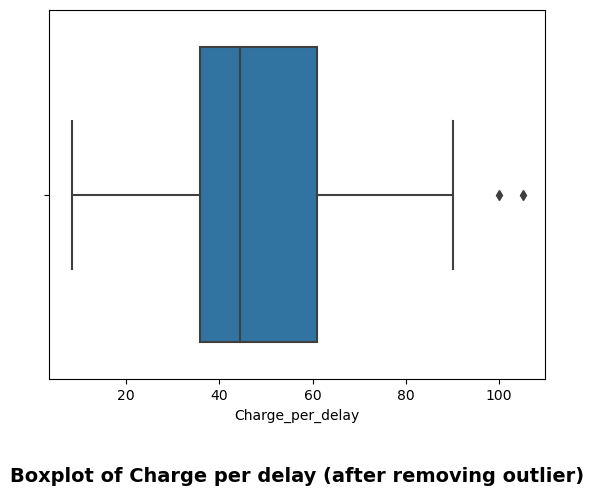

In [21]:
sns.boxplot(x='Charge_per_delay',data=final_df)
plt.title('Boxplot of Charge per delay (after removing outlier)',fontsize=14, fontweight='bold',loc='center',y=-0.3)

Text(0.5, -0.3, 'Distribution of Distance from blast site(after removing outlier)')

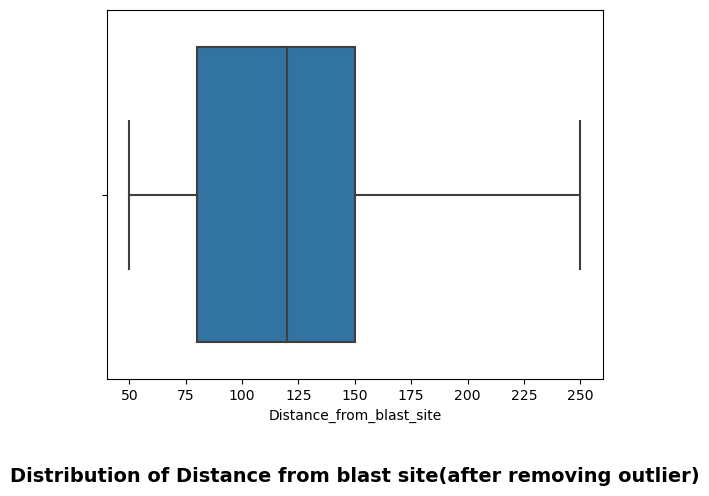

In [22]:
sns.boxplot(x='Distance_from_blast_site',data=final_df)
plt.title('Distribution of Distance from blast site(after removing outlier)',fontsize=14, fontweight='bold',loc='center',y=-0.3)

In [23]:
X=final_df[['Charge_per_delay', 'Distance_from_blast_site']]
y=final_df[['Mic_Peak']]

In [24]:
X.shape

(40, 2)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [29]:
X_train.shape

(36, 2)

In [30]:
X_test.shape

(4, 2)

# Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

In [33]:
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
y_pred = decision_tree_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("RMSE: ", rmse)
print(f"R-squared (R^2): {r2:.2f}")

Mean Squared Error (MSE): 14.06
Mean Absolute Error (MAE): 3.16
RMSE:  3.7490832212688994
R-squared (R^2): 0.87


Text(0.5, -0.3, 'Mic_Peak vs. Predicted Mic_Peak')

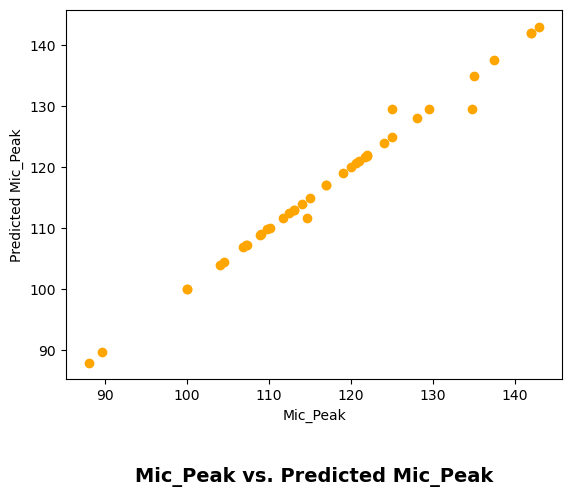

In [35]:
Mic_Peak_Predicted =decision_tree_regressor.predict(X)
plt.scatter(final_df['Mic_Peak'],Mic_Peak_Predicted,color='#FFA500')
plt.xlabel('Mic_Peak')
plt.ylabel('Predicted Mic_Peak')
plt.title('Mic_Peak vs. Predicted Mic_Peak',fontsize=14, fontweight='bold',loc='center',y=-0.3)

C:\Users\nimis\AppData\Local\Temp\ipykernel_1312\2718118085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Mic_Peak_Predicted)


Text(0.5, -0.3, 'Distribution of Predicted Mic Peak')

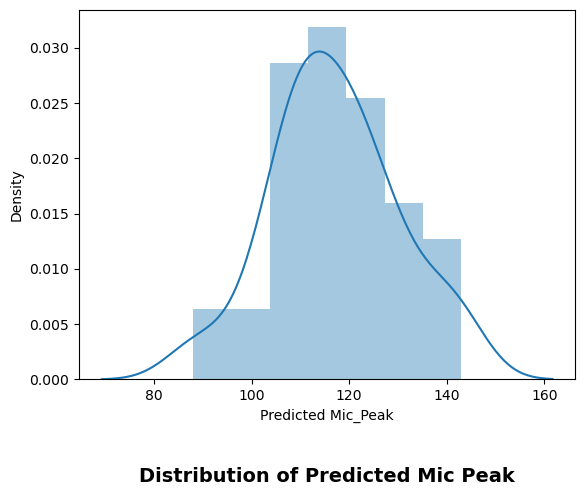

In [36]:
Mic_Peak_Predicted = decision_tree_regressor.predict(X)
sns.distplot(Mic_Peak_Predicted)
plt.xlabel('Predicted Mic_Peak')
plt.title('Distribution of Predicted Mic Peak',fontsize=14, fontweight='bold',loc='center',y=-0.3)

# Import Pickle File

In [37]:
import pickle

pickle.dump(decision_tree_regressor,open('decision_tree_model.pkl','wb'))
model=pickle.load(open('decision_tree_model.pkl','rb'))